# 01 MNIST Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import mnist dataset
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [3]:
ytrain.shape

(60000,)

In [4]:
xtrain[0].shape

(28, 28)

8


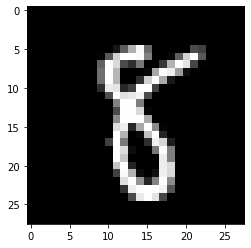

In [5]:
plt.imshow(xtrain[55002], cmap = 'gray')
print(ytrain[55002])

In [6]:
xtrain[55002]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21,  93,
        176, 248, 106,   0,   0,   0,   0,   0,  74,  64,   0,   0,   0,
          0,   0],
       [  

# preprocessing labels 

In [7]:
from keras.utils.np_utils import to_categorical

In [8]:
y_example = to_categorical(ytrain)

In [9]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_cat_test = to_categorical(ytest, 10)
y_cat_train = to_categorical(ytrain, 10)

# Preprocessing input (x)
### (Normalization)

In [12]:
xtrain = xtrain/255
xtest = xtest/255

In [13]:
xtrain.max()

1.0

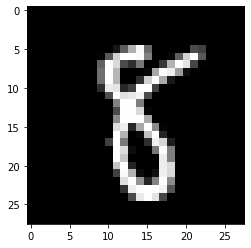

In [14]:
plt.imshow(xtrain[55002], cmap = 'gray')

In [15]:
# Reshape x data

In [16]:
xtrain = xtrain.reshape(60000, 28, 28, 1)
xtrain.shape

(60000, 28, 28, 1)

In [17]:
xtest = xtest.reshape(10000, 28, 28, 1)
xtest.shape

(10000, 28, 28, 1)

# modelling

## Membangun strutur Deep learning

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [30]:
model = Sequential()

## tahap feature extraction image
# Convolutional Layer
model.add(Conv2D(filters = 32, kernel_size = (4,4),
                input_shape = (28,28,1), activation = 'relu' ))
# Pooling Layer
model.add(MaxPool2D(pool_size = (2,2)))
# Flatten layer
model.add(Flatten())

## tahap processing pada NN
# Hidden layer (NN)
model.add(Dense(128, activation = 'relu'))

## tahap output klasifikasinya
# classifier layer
model.add(Dense(10, activation = 'softmax'))


model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [32]:
# model training
model.fit(xtrain, y_cat_train, epochs = 2)

Epoch 1/2
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1322 - accuracy: 0.9590
Epoch 2/2
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0485 - accuracy: 0.9857


# Evaluate model

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
model.evaluate(xtest, y_cat_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0442 - accuracy: 0.9857


[0.044215090572834015, 0.9857000112533569]

In [35]:
from sklearn.metrics import classification_report
ypred = model.predict(xtest)
classpred = np.argmax(ypred, axis = 1)

classpred[0]

7

In [36]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [37]:
# plt.imshow(ytest[0])

In [38]:
print(classification_report(ytest, classpred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       1.00      0.97      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [39]:
classpred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)